In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns

<ipython-input-26-c4f2cc3f44ea>:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [27]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [28]:
train = pd.read_csv("/content/mnist_train.csv", index_col = None)
X_train = train.drop('label', axis = 1)
y_train = train['label']
print(X_train.head(2))
print(y_train.head(2))
print(X_train.shape)

   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   
1    0    0    0    0    0    0    0    0    0     0  ...    0.0    0.0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[2 rows x 784 columns]
0    5
1    0
Name: label, dtype: int64
(37854, 784)


In [29]:
test = pd.read_csv("/content/mnist_test.csv")
X_test = test.drop('label', axis = 1)
y_test = test['label']
print(X_test.head(2))
print(y_test.head(2))

   1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  1x10  ...  28x19  28x20  \
0    0    0    0    0    0    0    0    0    0     0  ...      0      0   
1    0    0    0    0    0    0    0    0    0     0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  

[2 rows x 784 columns]
0    7
1    2
Name: label, dtype: int64


# Observación columnas y tamaño de los datos

In [30]:
train.shape

(37854, 785)

Podemos ver en este caso, cuando estamos interpretando el shape de train_images, podemos ver que se trata de un conjunto de 2867 imágenes de 28 x 28 (784), que es la cantidad de pixeles. Pero hay una columna más porque hay 785. Vamos a ver qué es esa columna de más.

In [31]:
train.head() # Vemos que en la primera columna hay el "label" que es lo que hay que predecir.

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
train.drop('label', 1) # Eliminamos la columna (axis=1) categorizado como label

<ipython-input-32-7065cc2fcd0c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('label', 1) # Eliminamos la columna (axis=1) categorizado como label


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37849,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37850,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37851,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37852,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Printar algunas imágenes del dataset para ver cómo son.

<ipython-input-33-d6aedc9adfa3>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  plt.imshow(np.reshape(train.drop('label', 1).values[1], (28,28)), cmap='gray')


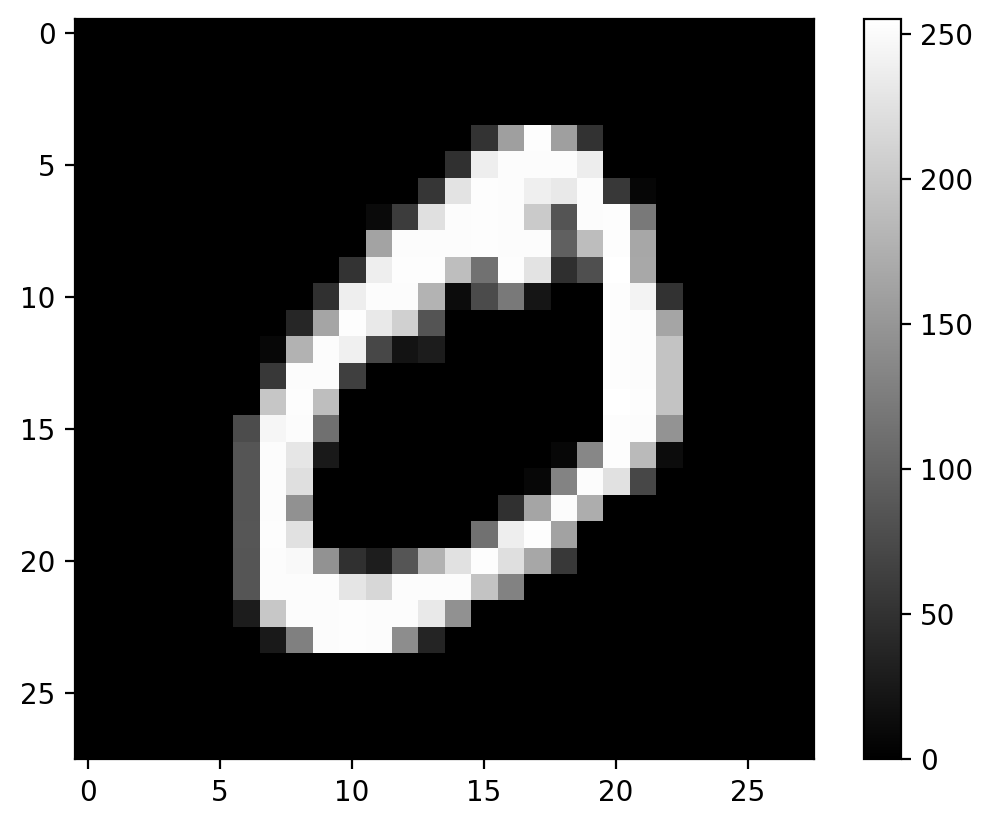

In [33]:
plt.figure()
plt.imshow(np.reshape(train.drop('label', 1).values[1], (28,28)), cmap='gray')
plt.colorbar();

#Entrenar una CNN para clasificar según la clase.

## Formateo y normalizado

Los valores de nuestra imagen estan compendidos entre 0 y 255, ya que se trata de una imagen en escala de grises.

In [34]:
train.drop('label', 1).values[1] # Vemos que efectivamente los valores no están normalizados.

<ipython-input-34-d9e6b12f2c75>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('label', 1).values[1] # Vemos que efectivamente los valores no están normalizados.


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [38]:
train.drop('label', 1).shape # El tamaño es (37854, 784)

<ipython-input-38-efe3a9415944>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train.drop('label', 1).shape # El tamaño es (37854, 784)


(10000, 785)

In [39]:
test.shape # El tamaño es (10000, 785)

(10000, 785)

Modificamos la estructura de nuestros datos (*train* y *test*) a la forma que nuestro modelo espera.

El primer número es el número de imágenes (37854 para train_images y 10000 para test_images).
Luego viene la forma de cada imagen (28x28). El último número es 1, significa una única capa de valor, ya que solo hay una matriz según la escala de grises. Si fueran imágenes a color, tendríamos tres matrices de 28x28.

In [37]:
train_reshaped = train.drop('label', 1).values.reshape(37854,28,28,1)
train_reshaped.shape

<ipython-input-37-13326e473c18>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train_reshaped = train.drop('label', 1).values.reshape(37854,28,28,1)


(37854, 28, 28, 1)

In [41]:
test_reshaped = test.drop('label', 1).values.reshape(10000,28,28,1)
test_reshaped.shape

<ipython-input-41-b1340267b705>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test_reshaped = test.drop('label', 1).values.reshape(10000,28,28,1)


(10000, 28, 28, 1)

Escalamos los datos entre 0 y 1. Para ello simplemente dividimos por 255.

In [42]:
train_reshaped_normalized = train_reshaped / 255
test_reshaped_normalized = test_reshaped / 255

## Entrenamiento de CNN

El tipo de modelo que usaremos es secuencial. Que permite construir un modelo capa por capa.

Usamos la función add() para agregar capas a nuestro modelo.

Las capas Conv2D son capas de convolución que tratarán con nuestras imágenes de entrada y que se ven como matrices bidimensionales.

El 64 en la primera capa y 32 en la segunda capa son el número de neuronas en cada capa.
Este número se puede ajustar para que sea mayor o menor.

El tamaño del kernel es el tamaño de la matriz de filtro para nuestra convolución.
Un kernel de 3 significa que tendremos una matriz de filtro de 3x3.

Nuestra primera capa también toma una forma de entrada, esta es la forma de cada imagen de entrada, (28,28,1)

Entre las capas Conv2D y la capa dense, hay una capa Flatten. Esta capa sirve como una conexión entre la convolución y las capas densas. Lo que está haciendo es pasar de un vector 2D a un vector de una única dimensión (aplana la matriz).

Dense es el tipo de capa que usaremos para nuestra capa de salida, es un tipo de capa estándar que se usa en muchos casos para redes neuronales.

Tendremos 10 neuronas en nuestra capa de salida, uno para cada resultado posible (0–9).

La activación función de activación de la última capa es softmax, que hace que la suma de salida sea de hasta 1 para que la salida se pueda interpretar como la probabilidad de que la entrada pertenezca a una clase concreta.
Así pues, cada neurona contiene una puntuación que indica la probabilidad de que la imagen actual pertenezca a una de las 10 clases.
El modelo luego hará su predicción en función de qué clase tiene la mayor probabilidad.

In [43]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Se entrena el modelo donde:
* *epochs* son cuantas épocas. O sea el número de veces que el modelo correrá todos los datos.
* *Batch_size* son cuantas imágenes pasan de golpe en grupo por la red de neuronas + su backtrain.
* *134/134* que sale debajo de Epoch es cuantas pasadas ha tenido que hacer (cada pasada de un *bach_size*) para terminar pasando todos los datos.

In [50]:
history = model.fit(train_reshaped_normalized, train['label'], validation_split = 0.1, batch_size = 256, epochs=3)


Epoch 1/3
134/134 [==============================] - 43s 315ms/step - loss: 0.7269 - accuracy: 0.7953 - val_loss: nan - val_accuracy: 0.9110
Epoch 2/3
134/134 [==============================] - 44s 327ms/step - loss: 0.2270 - accuracy: 0.9323 - val_loss: nan - val_accuracy: 0.9324
Epoch 3/3
134/134 [==============================] - 44s 321ms/step - loss: 0.1465 - accuracy: 0.9566 - val_loss: nan - val_accuracy: 0.9577


## Plot de la arquitectura del modelo.

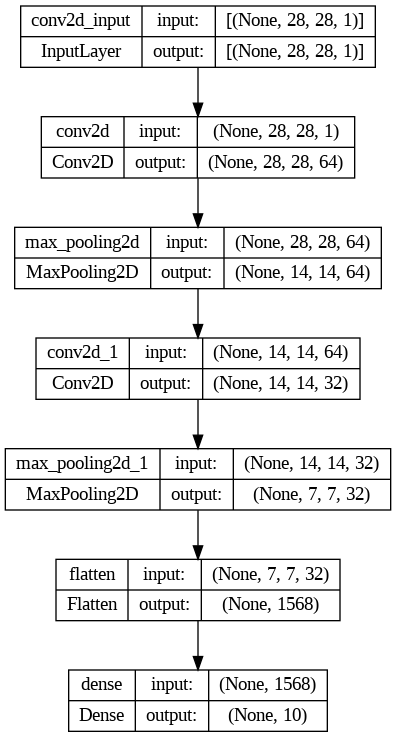

In [45]:
keras.utils.plot_model(model, "NuestraCNN.png", show_shapes=True)

# Cálculo de la Accuracy de clasificación y matriz de confusión

In [51]:
accuracy = model.evaluate(train_reshaped_normalized, train['label'])

print(accuracy[1], "Accuracy en Train",)

1183/1183 [==============================] - 11s 9ms/step - loss: nan - accuracy: 0.9648
0.964759349822998 Accuracy en Train


In [53]:
accuracy = model.evaluate(test_reshaped_normalized, test['label'])

print(accuracy[1], "Accuracy en Test",)

313/313 [==============================] - 3s 11ms/step - loss: 0.1145 - accuracy: 0.9657
0.9656999707221985 Accuracy en Test


In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predictions = model.predict(test_reshaped_normalized)
label_predictions = np.argmax(predictions,axis = 1)
confusion_matrix(test['label'], label_predictions)

313/313 [==============================] - 3s 8ms/step


array([[ 962,    0,    4,    1,    2,    0,    5,    3,    3,    0],
       [   0, 1124,    5,    0,    0,    1,    1,    0,    4,    0],
       [   3,    1, 1002,    4,    4,    0,    3,    7,    6,    2],
       [   1,    0,   15,  963,    0,   10,    0,    7,   11,    3],
       [   0,    0,    3,    0,  966,    0,    1,    2,    2,    8],
       [   3,    1,    0,   12,    0,  859,    7,    3,    4,    3],
       [  10,    3,    3,    1,    3,    3,  930,    1,    4,    0],
       [   2,    3,   22,    4,    3,    0,    0,  976,    1,   17],
       [   8,    1,    9,    8,    6,    4,    4,    5,  918,   11],
       [   6,    5,    0,    6,   12,    2,    0,   12,    9,  957]])

Se observa que los resultados son bastante buenos ya que:
* El accuracy es alto: *0,96*
* En la matriz de confusión la diagonal tiene valores de *~1000* y fuera de ella los valores no superan la primera decena.